#   <center><u><b>Exploratory Data Analysis (EDA) on mobile characteristics</b></u></center>

<p align="center">
  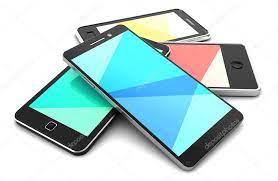
</p>

We will perform a quick exploratory data analysis (EDA) on mobile_characteristics dataframe. 

The data contains various information about mobile (see 1.3.Description).

## <u>Table of Contents</u>

#### &rarr; [1.Introduction](#introduction)
- [1.1.Objectives](#oap)
- [1.2.Where do the data come from?](#wdf)
- [1.3.Description of Variables](#wdf)


#### &rarr; [2.Dataframe Overview](#dpp)


#### &rarr; [3.Exploratory Data Analysis](#eda)
- [3.1.Distribution Viz](#eda1)
- [3.2.Data Cleaning](#eda2)
- [3.3.New Distribution](#eda3)
- [3.4.Impact of Variables on Ratings](#eda4)
- [3.5.Impact of Variables on Price](#eda5)


#### &rarr; [4.Processed DataFrame](#pdf)


#### &rarr; [5.Conclusion & Infos](#c&a)

## <u>1.Introduction<a id="introduction"></a></u>

### <u>1.1.Objectives and Problem Statement<a id="oap"></u>

#### <u>Objectives</u>

The characteristics of smartphones are essential aspects that influence their performance and user experience. From processing power to display resolution and camera capabilities, various features play a significant role in determining a smartphone's quality and user satisfaction.
    
    
Through data visualizations, we aim to gain insights into the distribution of smartphone features and understand how certain characteristics may impact their ratings and prices. Our ultimate goal is to prepare the data for machine learning, allowing us to build predictive models for smartphone ratings and prices based on their features.

### <u>1.2.Where do the data come from?<a id="wdf"></u>
    
The data used in this analysis is derived from a notebook available on Kaggle. The original data comes from the "Mobile Recommendation System Dataset" published by GYAN PRAKASH KUSHWAHA on Kaggle.
    
    
The data is available on Kaggle : [Mobile Characteristics Dataset](https://www.kaggle.com/code/cassienb/let-s-make-a-new-dataframe-regex-extraction)

### <u>1.3.Description of Variables<a id="wcd"></u>
    
    
<code>ratings</code> -The average rating given by users (numeric: between 2.9 and 5 ) 
    
    
<code>price</code> - The price of the phone in India (in dollars) (numeric: between 100 and 1094)  
    
    
<code>corpus</code> - This contains complete information of storage_ram, camera, oS_Processor, display, network and battery. (text)  
    
    
<code>brand</code> - The brand of the phone (nominal: 'samsung', 'redmi', 'vivo', 'oppo', 'oneplus', 'realme', 'infinix', 'tecno', 'motorola', 'mi', 'xiaomi')  
    
    
<code>mobile_name</code> - The name and version of the phone size (text)
    
    
<code>color</code> - The color of the phone (nominal: 'black', 'blue', 'green', 'white', 'grey', 'gold, 'silver', 'purple') 
    
    
<code>system</code> - The os of the phone (binary: 'android' - 'ios') 
    
    
<code>processor_type</code> - The type of processor of the phone (nominal: 'mediatek', 'qualcomm', 'intel', 'samsung')  
    
    
<code>resolution</code> - The resolution of the phone (ordinal: 'HD', 'Full HD', '2K', '4K')
    
    
<code>size</code> - The phone's size in inches (numeric: between 1.8 and 7.6)  
    
    
<code>storage</code> - The storage capacity of the phone in GB (numeric: between 32 and 256)  

## <u>2.Dataframe Overview<a id="dpp"></a></u>


We will now check the current format of the data and clean any potential outliers and other inconsistencies.

We import the DataFrame and remove the text variables:

<details>
<summary><b>Click to toggle code</b></summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('data/mobile_characteristics.csv')

data.drop(columns=['imgURL','mobile_name','corpus'], inplace=True)
```

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('data/mobile_characteristics.csv')

data.drop(columns=['imgURL','mobile_name','corpus'], inplace=True)

In [89]:
data.head(3)

,ratings,price,brand,color,storage,system,processor_type,resolution,size
0,4.2,291,redmi,black,128,android,mediatek,Full HD,6.7
1,4.5,255,oppo,green,128,android,mediatek,Full HD,6.5
2,4.2,159,redmi,white,64,android,intel,Full HD,6.4


Some dataframe's infos:

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ratings         1571 non-null   float64
 1   price           1571 non-null   int64  
 2   brand           1571 non-null   object 
 3   color           1571 non-null   object 
 4   storage         1571 non-null   int64  
 5   system          1571 non-null   object 
 6   processor_type  1571 non-null   object 
 7   resolution      1571 non-null   object 
 8   size            1570 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 110.6+ KB


In [91]:
data.describe()

,ratings,price,storage,size
count,1571.000000,1571.000000,1571.000000,1570.000000
mean,4.291598,227.200509,120.748568,6.408662
std,0.195179,97.816889,67.498411,0.439655
min,2.900000,100.000000,32.000000,1.800000
25%,4.200000,152.500000,64.000000,6.400000
50%,4.300000,206.000000,128.000000,6.500000
75%,4.400000,291.000000,128.000000,6.600000
max,5.000000,1094.000000,256.000000,7.600000


## <u>3.Exploratory Data Analysis<a id="eda"></a></u>

### <u>3.1.Distribution Viz<a id="wcd"></u>


Let's take a look at the distribution of our variables:

<details>
<summary><b>Click to toggle code</b></summary>

```python
# Calculate the number of rows and columns needed to display the subplots
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Plot the distribution graphs for each column
for i, column in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4
    axes[row_idx, col_idx].hist(data[column], bins=20, density=False, alpha=0.6)
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Density')

# Remove any unused subplots
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

# Adjust the spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()
```

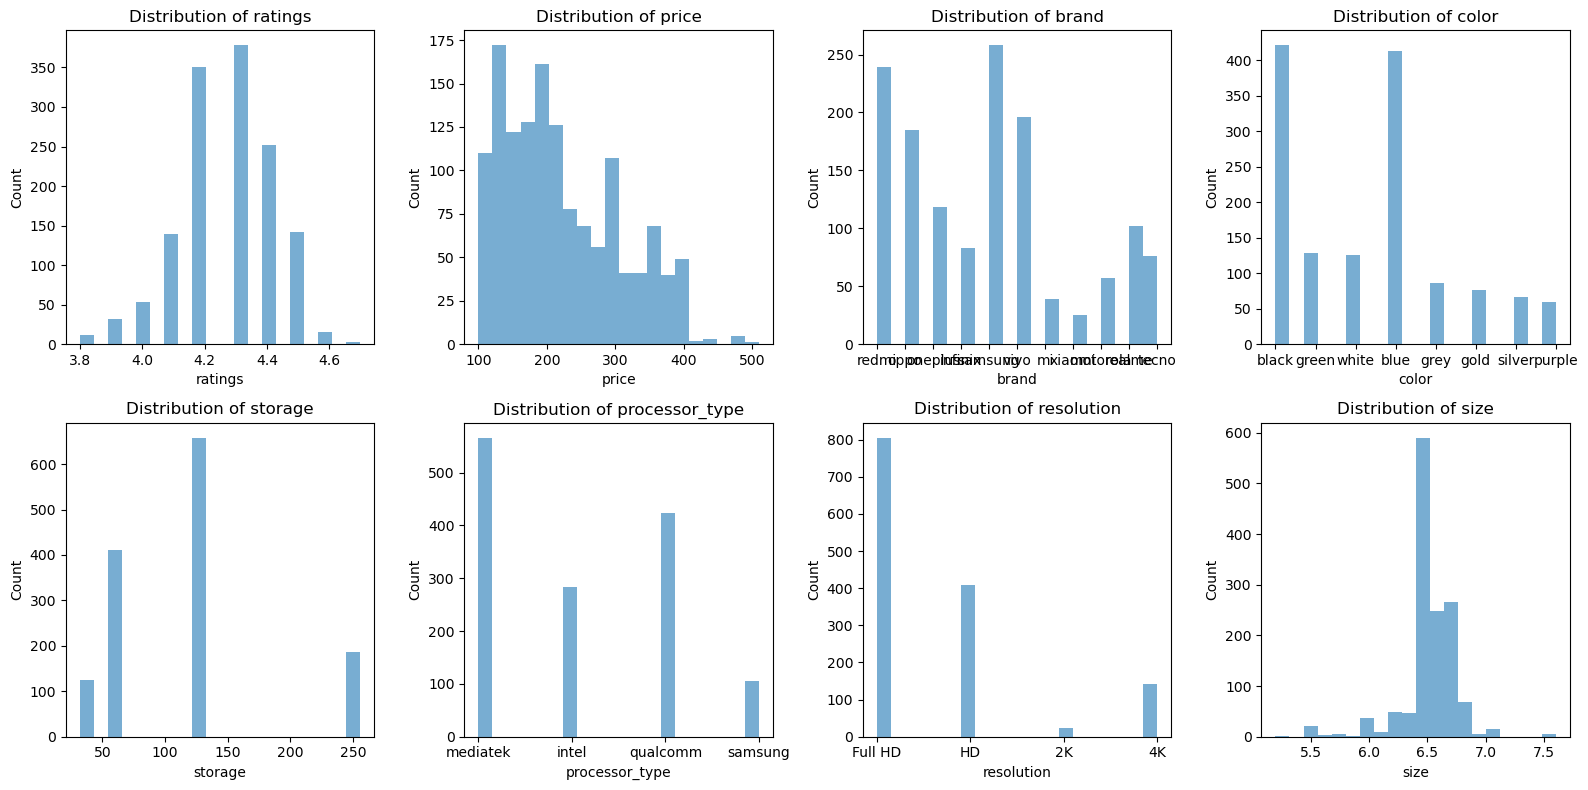

In [50]:
# Calculate the number of rows and columns needed to display the subplots
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Plot the distribution graphs for each column
for i, column in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4
    axes[row_idx, col_idx].hist(data[column], bins=20, density=False, alpha=0.6)
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Count')

# Remove any unused subplots
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

# Adjust the spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()

If you want to have a more individual view:

<details>
<summary><b>Click to toggle code</b></summary>

```python
import ipywidgets as widgets
from IPython.display import display

def plot_distribution(column):
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, density=False, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Create a selection widget to choose the column
column_selector = widgets.Dropdown(
    options=data.columns,
    description='Choose a column:',
    disabled=False,
)

# Apply the plotting function when the widget value changes
widgets.interactive(plot_distribution, column=column_selector)
```

In [21]:
import ipywidgets as widgets
from IPython.display import display

def plot_distribution(column):
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, density=False, alpha=0.6)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Create a selection widget to choose the column
column_selector = widgets.Dropdown(
    options=data.columns,
    description='Choose a column:',
    disabled=False,
)

# Apply the plotting function when the widget value changes
widgets.interactive(plot_distribution, column=column_selector)

interactive(children=(Dropdown(description='Choose a column:', options=('ratings', 'price', 'brand', 'color', …

**It seems that there are some treatments to be done on our variables.**

### <u>3.2.Data cleaning<a id="eda2"></u>

First, we will <u>remove the outliers</u> from the numerical variables using the Z-score :

<details>
<summary><b>Click to toggle code</b></summary>

```python
def remove_outliers_zscore(df, column_names, threshold=3):
    # Copy the original DataFrame to avoid modifying the original data
    df_cleaned = df.copy()

    for column_name in column_names:
        # Calculate the Z-score for the column
        z_scores = (df_cleaned[column_name] - df_cleaned[column_name].mean()) / df_cleaned[column_name].std()

        # Identify outliers based on the threshold
        outliers_mask = abs(z_scores) > threshold

        # Remove outliers from the DataFrame
        df_cleaned = df_cleaned[~outliers_mask].copy()

    return df_cleaned

# Example usage:
# Assuming 'data' is your DataFrame and 'column_name' is the column with outliers

numeric_cols = ['ratings','price','size','storage']
data = remove_outliers_zscore(data, numeric_cols)
```

In [92]:
def remove_outliers_zscore(df, column_names, threshold=3):
    # Copy the original DataFrame to avoid modifying the original data
    df_cleaned = df.copy()

    for column_name in column_names:
        # Calculate the Z-score for the column
        z_scores = (df_cleaned[column_name] - df_cleaned[column_name].mean()) / df_cleaned[column_name].std()

        # Identify outliers based on the threshold
        outliers_mask = abs(z_scores) > threshold

        # Remove outliers from the DataFrame
        df_cleaned = df_cleaned[~outliers_mask].copy()

    return df_cleaned

# Example usage:
# Assuming 'data' is your DataFrame and 'column_name' is the column with outliers

numeric_cols = ['ratings','price','size','storage']
data = remove_outliers_zscore(data, numeric_cols)

In [93]:
data.shape

(1496, 9)

Next, we will observe the <u>distribution of the "system" variable</u>, and if we find it too imbalanced, we will consider removing it : 

<details>
<summary><b>Click to toggle code</b></summary>

```python
length = 1496

data['system'].value_counts() / length
```

In [94]:
length = 1496

data['system'].value_counts() / length

android    0.921123
ios        0.078877
Name: system, dtype: float64

Our variable is completely <u>imbalanced</u>. We will remove the occurrences of 'ios' and then delete the 'system' column as it will no longer be needed :


<details>
<summary><b>Click to toggle code</b></summary>

```python
# Remove all occurrences of 'ios'
data = data[data['system'] != 'ios']

# Drop the 'system' column
data.drop(columns='system', inplace=True)
```

In [95]:
# Remove all occurrences of 'ios'
data = data[data['system'] != 'ios']

# Drop the 'system' column
data.drop(columns='system', inplace=True)

In [96]:
data.shape

(1378, 8)

By observing the distribution of the variables, we notice that converting the numerical variable 'storage' into an nominal variable seems more appropriate to create an ordinal one later:

<details>
<summary><b>Click to toggle code</b></summary>

```python
data['storage'] = pd.cut(data['storage'], bins=[0, 64, 128, 256, float('inf')], labels=['32GB', '64GB', '128GB', '256GB'], right=False)
```

In [97]:
data['storage'] = pd.cut(data['storage'], bins=[0, 64, 128, 256, float('inf')], labels=['32GB', '64GB', '128GB', '256GB'], right=False)

### <u>3.3.New Distribution<a id="eda3"></u>
    
Let's examine our new distribution : 

<details>
<summary><b>Click to toggle code</b></summary>

```python
# Calculate the number of rows and columns needed to display the subplots
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Plot the distribution graphs for each column
for i, column in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4
    axes[row_idx, col_idx].hist(data[column], bins=20, density=False, alpha=0.6)
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Density')

# Remove any unused subplots
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

# Adjust the spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()
```

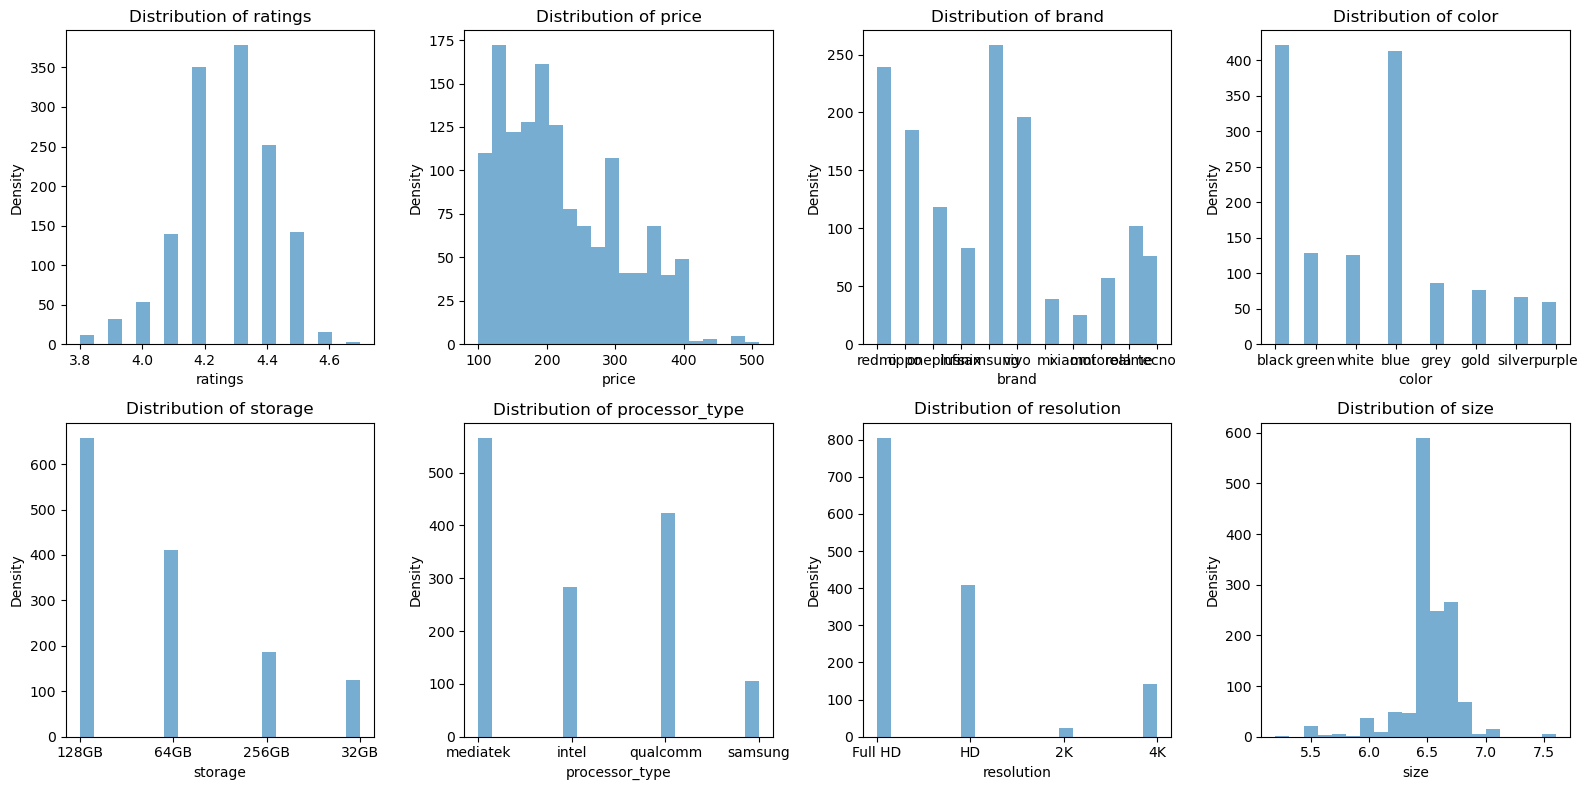

In [99]:
# Calculate the number of rows and columns needed to display the subplots
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Plot the distribution graphs for each column
for i, column in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4
    axes[row_idx, col_idx].hist(data[column], bins=20, density=False, alpha=0.6)
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Density')

# Remove any unused subplots
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

# Adjust the spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()

**The distributions of our variables appear satisfactory.**

### <u>3.4.Impact of Variables on Ratings<a id="eda4"></u>

As before, we only provide a visualization of the impact of each variable on our target variables of interest, here the <u>rating</u>.  
We offer a visualization using bar plots to compare the distribution of variables with respect to the mean rating. We have chosen bar plots because the majority of our variables are ordinal or categorical.
    
<details>
<summary><b>Click to toggle code</b></summary>

```python

# Calculate the number of rows and columns needed for the subplots
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of ratings for each category in the current column
    mean_ratings_by_column = data.groupby(column)['ratings'].mean()

    # Plot the bar plot for ratings mean by category in the current column
    sns.barplot(x=mean_ratings_by_column.index, y=mean_ratings_by_column.values, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Mean Rating (ratings) by {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Mean Rating (ratings)')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()
```

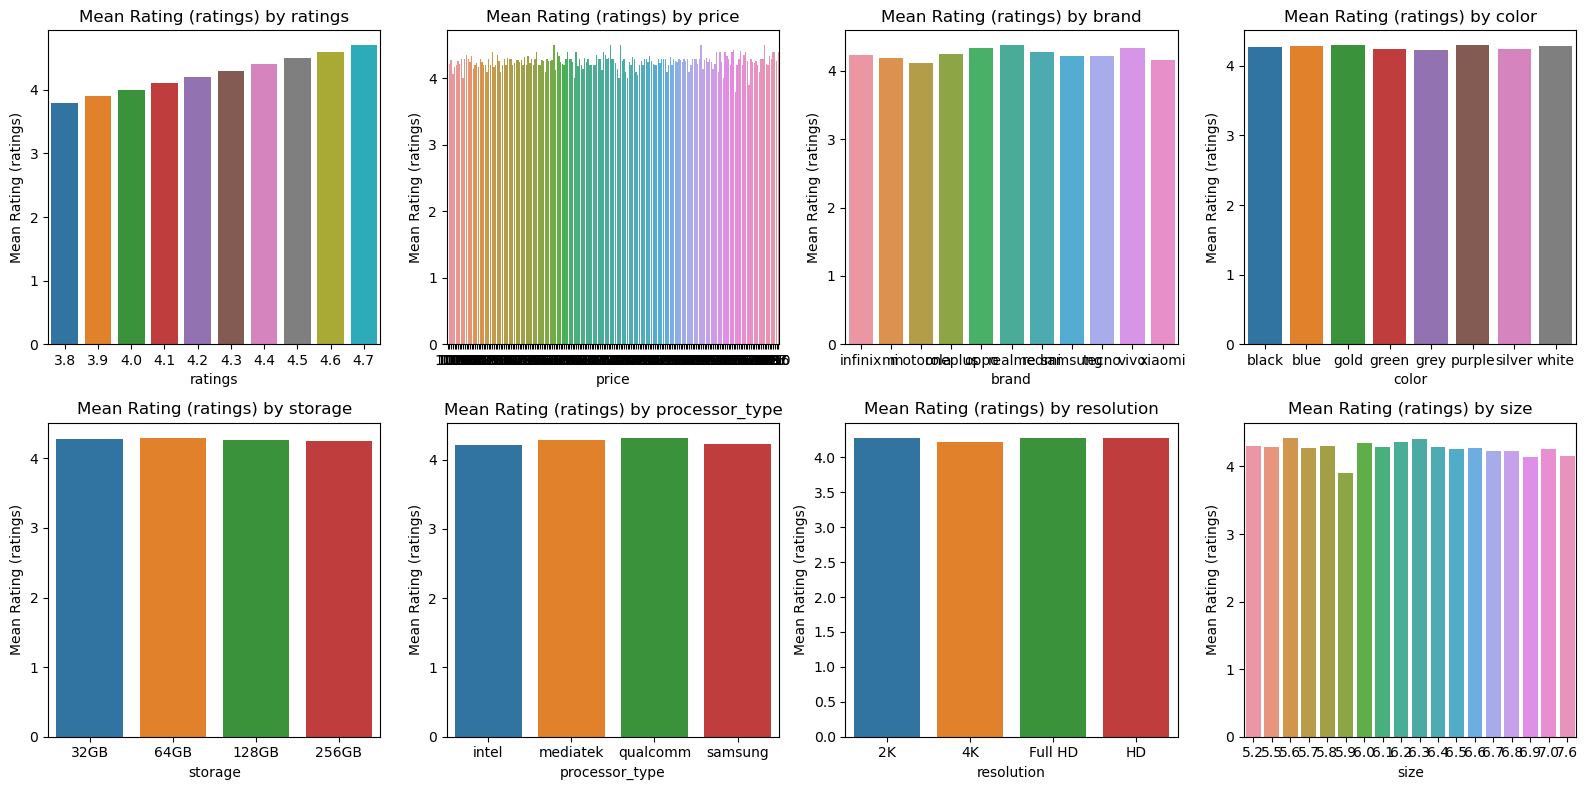

In [100]:
# Calculate the number of rows and columns needed for the subplots
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of ratings for each category in the current column
    mean_ratings_by_column = data.groupby(column)['ratings'].mean()

    # Plot the bar plot for ratings mean by category in the current column
    sns.barplot(x=mean_ratings_by_column.index, y=mean_ratings_by_column.values, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Mean Rating (ratings) by {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Mean Rating (ratings)')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()


We made 2 scatterplot for <u>numerical variables</u> :

<details>
<summary><b>Click to toggle code</b></summary>

```python

# Calculate the mean rating for each price
mean_rating_by_price = data.groupby('price')['ratings'].mean().reset_index()

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='ratings', data=mean_rating_by_price)
plt.title('Scatterplot of Price vs. Mean Rating')
plt.xlabel('Price')
plt.ylabel('Mean Rating')
plt.show()
```

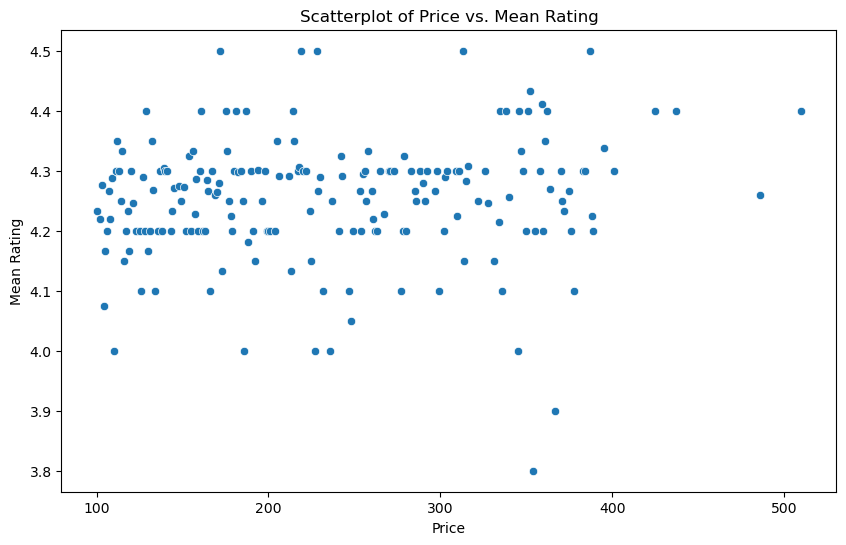

In [113]:
# Calculate the mean rating for each price
mean_rating_by_price = data.groupby('price')['ratings'].mean().reset_index()

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='ratings', data=mean_rating_by_price)
plt.title('Scatterplot of Price vs. Mean Rating')
plt.xlabel('Price')
plt.ylabel('Mean Rating')
plt.show()

<details>
<summary><b>Click to toggle code</b></summary>

```python

# Calculate the mean rating for each price
mean_rating_by_price = data.groupby('price')['ratings'].mean().reset_index()

# Create the scatterplot
# Calculate the mean rating for each price
mean_rating_by_size = data.groupby('size')['ratings'].mean().reset_index()

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='ratings', data=mean_rating_by_size)
plt.title('Scatterplot of Size vs. Mean Rating')
plt.xlabel('Size')
plt.ylabel('Mean Rating')
plt.show()
```

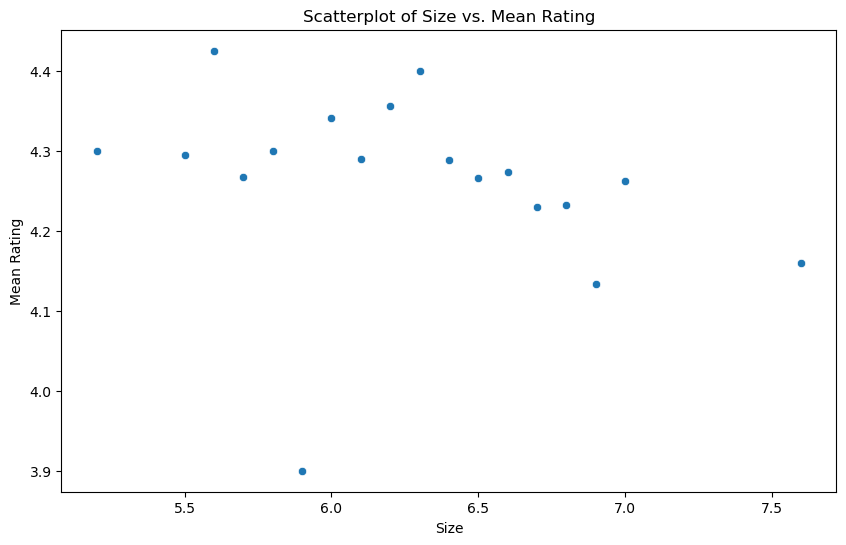

In [115]:
# Calculate the mean rating for each price
mean_rating_by_size = data.groupby('size')['ratings'].mean().reset_index()

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='ratings', data=mean_rating_by_size)
plt.title('Scatterplot of Size vs. Mean Rating')
plt.xlabel('Size')
plt.ylabel('Mean Rating')
plt.show()

**It appears that our variables do not seem to have a significant impact on our target variable 'ratings'. However, this is only a hypothesis based on the visualization of the graphs. If you want to be certain, statistical tests should be conducted, but that is not the objective here.**

### <u>3.4.Impact of Variables on Price<a id="eda5"></u>
    


Now, let's take a look at the target variable 'price' :

<details>
<summary><b>Click to toggle code</b></summary>

```python

# Calculate the number of rows and columns needed for the subplots
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of ratings for each category in the current column
    mean_ratings_by_column = data.groupby(column)['price'].mean()

    # Plot the bar plot for ratings mean by category in the current column
    sns.barplot(x=mean_ratings_by_column.index, y=mean_ratings_by_column.values, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Mean Price (in dollar) by {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Mean Price (in dollar)')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()
```

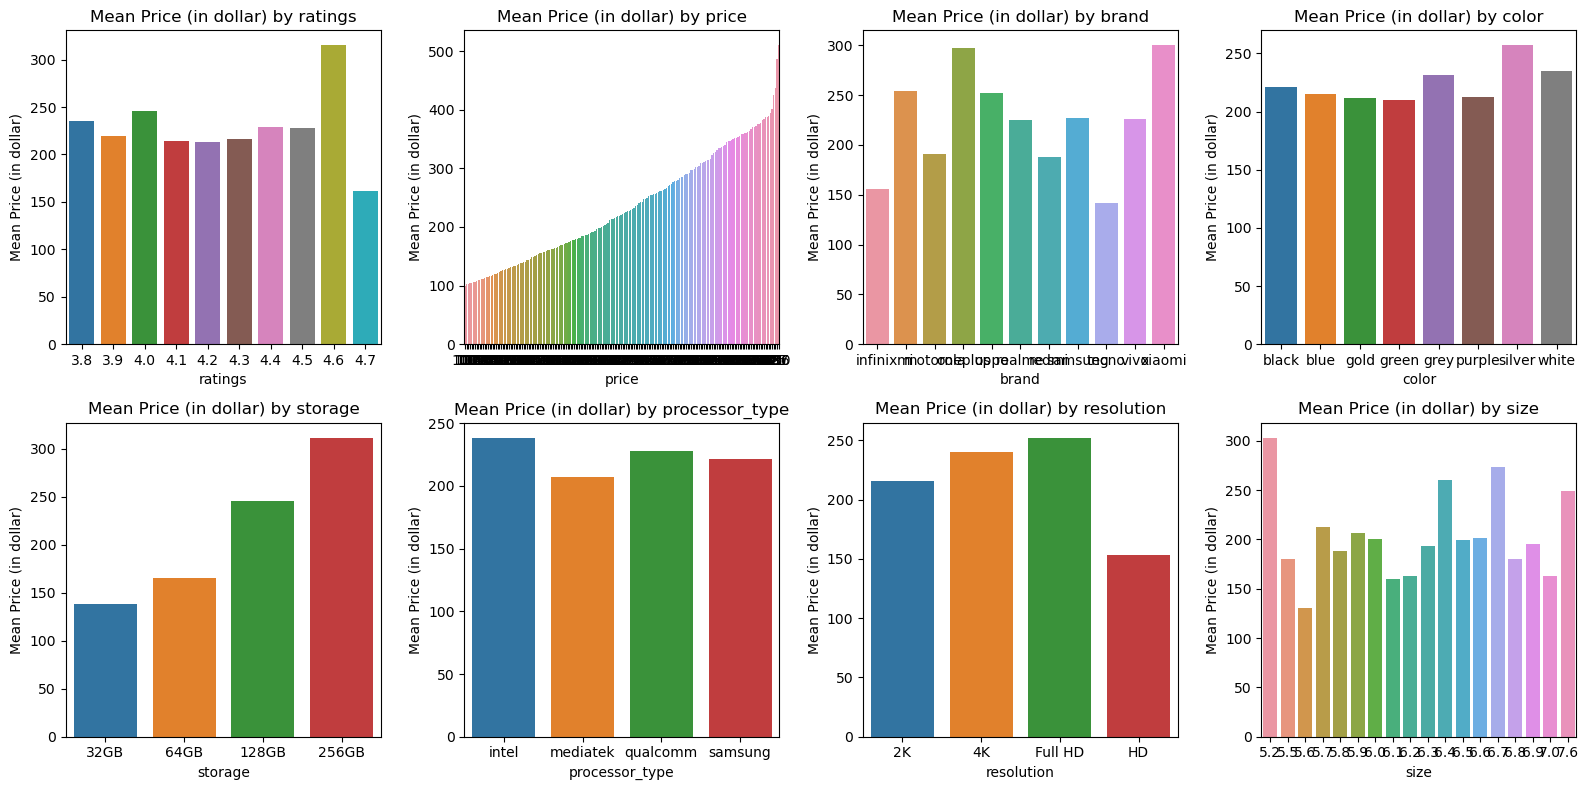

In [103]:
# Calculate the number of rows and columns needed for the subplots
num_cols = len(data.columns)
num_rows = (num_cols - 1) // 4 + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of ratings for each category in the current column
    mean_ratings_by_column = data.groupby(column)['price'].mean()

    # Plot the bar plot for ratings mean by category in the current column
    sns.barplot(x=mean_ratings_by_column.index, y=mean_ratings_by_column.values, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Mean Price (in dollar) by {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Mean Price (in dollar)')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

# Show the plots
plt.show()

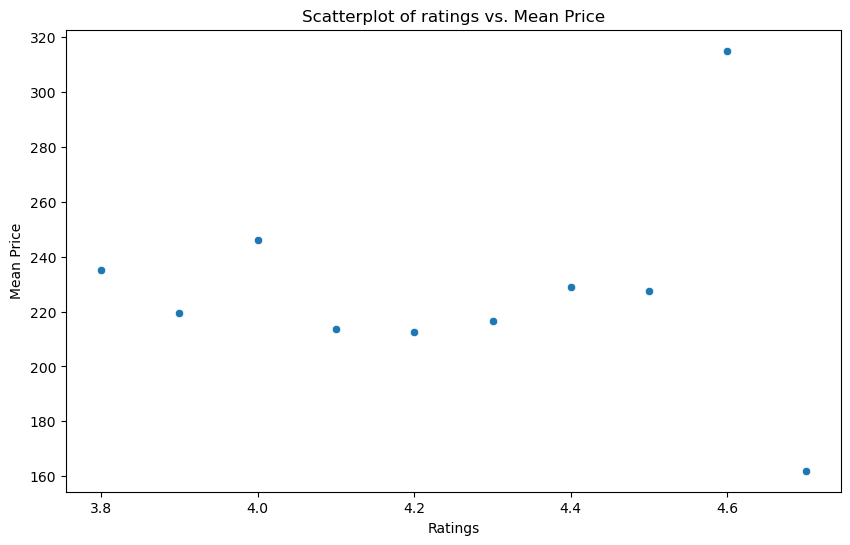

In [117]:
# Calculate the mean rating for each price
mean_rating_by_price = data.groupby('ratings')['price'].mean().reset_index()

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ratings', y='price', data=mean_rating_by_price)
plt.title('Scatterplot of ratings vs. Mean Price')
plt.xlabel('Ratings')
plt.ylabel('Mean Price')
plt.show()

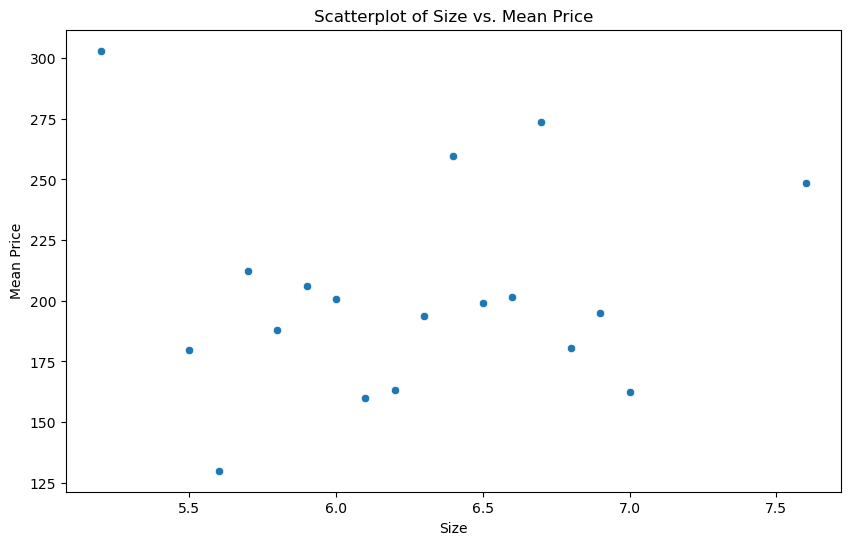

In [118]:
# Calculate the mean rating for each price
mean_rating_by_price = data.groupby('size')['price'].mean().reset_index()

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='price', data=mean_rating_by_price)
plt.title('Scatterplot of Size vs. Mean Price')
plt.xlabel('Size')
plt.ylabel('Mean Price')
plt.show()

**The variables appear to have a significant impact on the smartphone's price. However, we must emphasize that this is just a hypothesis and further analysis would be required to confirm the relationship.**

## <u>4.Processed DataFrame<a id="introduction"></a></u>


Here you will find the processed dataframe along with the updated description of the variables.

In [120]:
data.head(2)

,ratings,price,brand,color,storage,processor_type,resolution,size
0,4.2,291,redmi,black,128GB,mediatek,Full HD,6.7
1,4.5,255,oppo,green,128GB,mediatek,Full HD,6.5


<u><b>Description:</b></u>

<code>ratings</code> -The average rating given by users (numeric: between 2.9 and 5 ) 
    
    
<code>price</code> - The price of the phone in India (in dollars) (numeric: between 100 and 510)  
        
    
<code>brand</code> - The brand of the phone (nominal: 'samsung', 'redmi', 'vivo', 'oppo', 'oneplus', 'realme', 'infinix', 'tecno', 'motorola', 'mi', 'xiaomi')  
        
    
<code>color</code> - The color of the phone (nominal: 'black', 'blue', 'green', 'white', 'grey', 'gold, 'silver', 'purple') 
        
    
<code>processor_type</code> - The type of processor of the phone (nominal: 'mediatek', 'qualcomm', 'intel', 'samsung')  
    
    
<code>resolution</code> - The resolution of the phone (ordinal: 'HD', 'Full HD', '2K', '4K')
    
    
<code>size</code> - The phone's size in inches (numeric: between 5.2 and 7.6)  
    
    
<code>storage</code> - The storage capacity of the phone in GB (nominal: '32GB', '64GB', '128GB', '256GB')  

<u>If u want to save it :</u>

In [128]:
data.to_csv('data/mobile_characteristics_processed.csv', index=False)

## <u>5.Conclusion & Infos<a id="introduction"></a></u>


**Conclusion:**


In conclusion, our analysis indicates that the variables may have an impact on the smartphone's price. However, it is important to remember that this is only a hypothesis based on the observed patterns in the data. To draw more definitive conclusions, further statistical tests and in-depth analysis would be necessary. Our current exploration focused on data preprocessing, feature extraction, and initial visualization. For a more comprehensive understanding and accurate predictions, additional modeling and rigorous testing would be essential.

**Infos :**


If you desire more information on data preprocessing or Machine Learning techniques, I invite you to visit my GitHub repository: My_GitHub

You can already find "Let's-make-a-New-Dataframe-Data-Exploration-and-DataFrame-Extraction-with-Regex," which serves as the prequel to this notebook. Additionally, a future notebook may be released soon, focusing on building a predictive model for both price and possibly ratings. 



**Stay tuned for more exciting data exploration and machine learning endeavors!**

# Thank you for your attention and consideration !